### Task 3. November 16th, 2020: 
Research these Excel standard deviation functions of STDEV.P and STDEV.S, noting the difference between them. Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. 

### Solution

### 1. Standard Deviation

Standard deviation is a measure of the amount of variation in a set of numbers. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range.[1] Wikipedia:Standard Deviation https://en.wikipedia.org/wiki/Standard_deviation. Below shows a bell curve of how you would expect normal data to fall around an average point. 
![StandardDeviation](Images/StandardDeviation.PNG)
(https://towardsdatascience.com/using-standard-deviation-in-python-77872c32ba9b)<br>
For example, if you were to measure the height of the male population of adults between the age of 30 and 50 in a country, you would get a similar shape distribution of height around the mean/average height. The majority of people would have heights close around the average and the further you drift from the average height, the less number of people you would expect to measure. To emphasise this, you would expect to find the majority of the population between 5'7 and 6'2, and you would expect very few people at 4'8 or 6'7. Standard deviation calculates how far from the average of the dataset lie 68% of the population. If the standard deviation is a relatively small figure, then this signifies that the dataset is tight to the mean, wheras a large standard deviation indicates the dataset is more spread out.

### 2. STDEV.P vs STDEV.P

In calculating the standard deviation of a population, depending on whether it is the standard deviation of a <b>sample</b> of the population or the standard deviation of the <b>entire</b> population that is being calculated, slightly different formulae are used.<br>
If you are calculating the standard deviation of the entire population/dataset the following formula is used:
$$ STDEV.P = \sqrt{\frac{1}{N}\sum({x - \bar{x})^2}} $$

If you are calculating the standard deviation of a sammple of the-1 population/dataset the following formula is used:
$$ STDEV.S = \sqrt{\frac{1}{N-1}\sum({x - \bar{x})^2}} $$

As can be seen, the difference between the two equations is the denominator being N for the entire population, whereas it is N -1 for the sample of the population. When dealing with only samples of the population, it turns out that dividing by N-1 is a more accurate estimator of the standard deviation of the population than dividing N. This can be reasoned by arguing that the entire population incorporates all the data known, meaning that all extremities of data are known. Hence the mean, and the variance around this mean is decided. However, when using only a sample of the population, all extremities of the data will not be included. When calculating the mean of the sample, it is possible that the same mean as that calculated for the entire population is observed. But, the variance around the mean of the sample will always be smaller than what the variance of the full population is. Dividing by N for the sample represents this underestimation of the variance. To compensate for this, we divide by N - 1 for a sample - By dividing by a smaller number we are increasing the overall calculation for the standard deviation of the sample, but this is in fact a more accurat estimation than if we were to divide by N. We will run a simulation to confirm that using N-1 for a sample is better estimate for the standard deviation of the entire population than using N.<br>
https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/another-simulation-giving-evidence-that-n-1-gives-us-an-unbiased-estimate-of-variance

### 3. Simulation

In [1]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Generate 100 random numbers to be used to represent a population

In [2]:
# Create a list of 100 numbers of normal random distribution around the number 10
# pandas.DataFrame is a two-dimensional tabular data structure ie Rows and Columns
df = pd.DataFrame(np.random.normal(10, 2, 100), columns=list('A'))
df

,A
0,12.400688
1,11.157671
2,9.489007
3,11.407570
4,11.004988
...,...
95,10.234059
96,11.238304
97,9.022329
98,11.778694


Graphically show what these randon numbers look like on a bar chart 

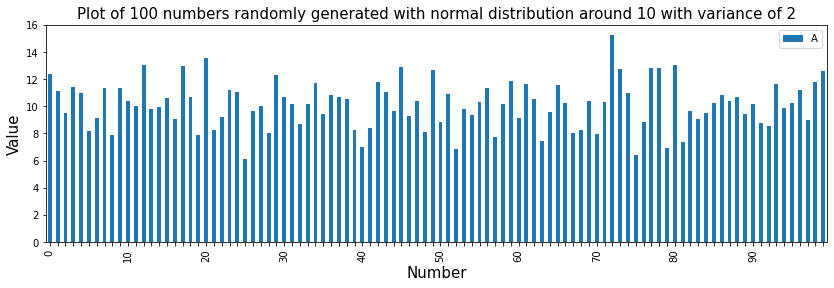

In [3]:
# Adjust the output plot sizes to be full page width
plt.rcParams['figure.figsize'] = (14,4)
# Plot a bar chart displaying each f the random numbers generated
ax = df.plot(kind='bar')
# Adding plot titles and axis labels, with font size adjustments
plt.title('Plot of 100 numbers randomly generated with normal distribution around 10 with variance of 2', size=15)
plt.xlabel('Number', size=15)
plt.ylabel('Value', size=15)
# Adjust the x-axis ticks to only display every 10th tick label. 
# https://stackoverflow.com/questions/56095446/pandas-plot-bar-show-every-nth-xlabel
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
      t.set_visible(False)

As can be seen, these random numbers vary around the number 10 according to a normal distribution and a variance of 2. The Standard Deviation of this population is calculated below, using the STDEV.P equation above

In [4]:
# Select colum A from the dataframe, containing the 100 randomly geerated numbers
x = df['A']
# Calculate STDEV.P of the entire population of x, using the STDEV.P equation above
a = np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)))
a

1.7170440721098648

Now, we will run a simulation to pick 1000 different samples of different sizes from the above population, calculate the sttandard deviation of the sample using both STDEV.S and STDEV.P equations, and calculate the mean of each of the results over the 1000 iterations. We will compare the accuracy of each with the result we obtained above for the standard deviation of the entire population above (ie a) 

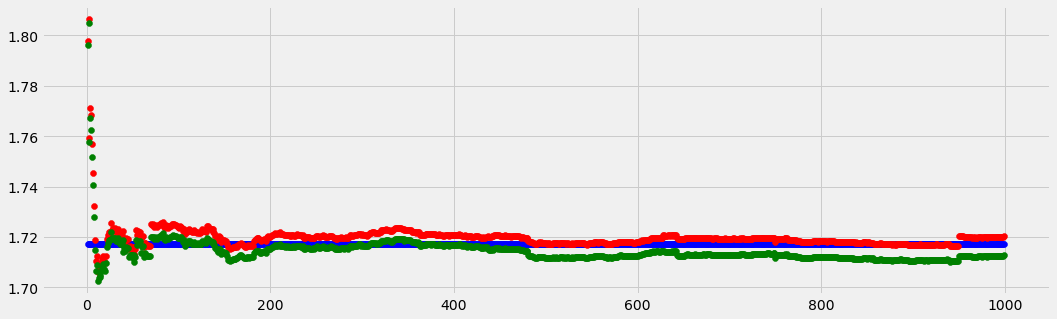

Std Dev of entire Population is: 1.7170440721098648
The estimated Std Dev of the population, using STDEV.S of 1000 samples within the Population is: 1.720262104823262
The estimated Std Dev of the population, using STDEV.P of 1000 samples within the Population is 1.712776196103822
Accuracy of STDEV.S of a sample:  0.0032180327133972675
Accuracy of STDEV.p of a sample:  0.004267876006042837
STDEV.S is a more accuratete estimation of Std Dev of population than STDEV.P


In [70]:
# Initialise b and c used below
b = 0
c = 0
index = []
STDEV = []
STDEVS = []
STDEVP = []

for i in range(1,1000):
    # Select a random integer between 2 and 100. This will consitiute the size of the sample
    rand = np.random.randint(2, 1000)
    # Take a random sample of size "rand" from the population.
    # https://docs.scipy.org/doc//numpy-1.10.4/reference/generated/numpy.random.choice.html
    y = np.random.choice(x, rand)
    # Calculate STDEV.S of this sample
    b = b + np.sqrt(np.sum((y - np.mean(y))**2)/(len(y)-1))
    # Calculate the total of STDEV.S so far calculated
    meanb = b/i
    #print(meanb)
    # Calculate STDEV.P of this sample
    c = c + np.sqrt(np.sum((y - np.mean(y))**2)/(len(y)))
    # Calculate the total of STDEV.S so far calculated
    meanc = c/i
    #print(meanb, meanc)
    index.append(i)
    STDEV.append(a)
    STDEVS.append(meanb)
    STDEVP.append(meanc)
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(index,STDEV, color='b')
#ax = fig.add_subplot(132)
ax.scatter(index,STDEVS, color='r')
#ax = fig.add_subplot(133)
ax.scatter(index,STDEVP,color='g')
plt.show()


# Print the Standard Deviation of the entire population
print("Std Dev of entire Population is:", a) 
# Print the mean of the STDEV_S calculated over the 100 simulation
print("The estimated Std Dev of the population, using STDEV.S of 1000 samples within the Population is:",meanb)
# Print the mean of the STDEV_P calculated over the 100 simulation
print("The estimated Std Dev of the population, using STDEV.P of 1000 samples within the Population is", meanc)
# Print True/False that STDEV.S of the samples is closer to the Standard Deviation of the population than the STDEV.P
print("Accuracy of STDEV.S of a sample: ", abs(a - meanb))
print("Accuracy of STDEV.p of a sample: ", abs(a - meanc))      
if(abs(a - meanb) < abs(a - meanc)):
    print("STDEV.S is a more accuratete estimation of Std Dev of population than STDEV.P")
else:
    print("STDEV.S is not a more accuratete estimation of Std Dev of population than STDEV.P")